# Professors Performance Analysis using ANN

### Import required libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

# Exploratory Data Analysis

In [43]:
df = pd.read_csv("f:Work/professors_performance.csv", header=0)
df.head()

,CO_PROFESSOR,TT,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q010,TX_RESP_Q005,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q010.1,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018
0,2017176053,1,1,4,3,4,4,2,2,4,3,2,3,1,0,1
1,2017282685,1,1,4,3,4,4,2,2,4,3,2,3,1,0,1
2,2017289663,1,1,4,3,4,4,2,2,4,3,2,3,1,0,1
3,2017055337,1,1,4,3,4,4,2,2,4,3,2,3,1,0,1
4,2017055338,1,1,1,2,6,3,0,0,6,5,2,1,0,0,2


In [44]:
data=df.drop(['TX_RESP_Q010.1','CO_PROFESSOR', 'TT'], axis=1)
data.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q010,TX_RESP_Q005,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018
0,1,4,3,4,4,2,2,3,2,3,1,0,1
1,1,4,3,4,4,2,2,3,2,3,1,0,1
2,1,4,3,4,4,2,2,3,2,3,1,0,1
3,1,4,3,4,4,2,2,3,2,3,1,0,1
4,1,1,2,6,3,0,0,5,2,1,0,0,2


In [45]:
data.shape

(6844, 13)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   TX_RESP_Q001  6844 non-null   int64
 1   TX_RESP_Q002  6844 non-null   int64
 2   TX_RESP_Q004  6844 non-null   int64
 3   TX_RESP_Q010  6844 non-null   int64
 4   TX_RESP_Q005  6844 non-null   int64
 5   TX_RESP_Q008  6844 non-null   int64
 6   TX_RESP_Q009  6844 non-null   int64
 7   TX_RESP_Q013  6844 non-null   int64
 8   TX_RESP_Q014  6844 non-null   int64
 9   TX_RESP_Q015  6844 non-null   int64
 10  TX_RESP_Q016  6844 non-null   int64
 11  TX_RESP_Q017  6844 non-null   int64
 12  TX_RESP_Q018  6844 non-null   int64
dtypes: int64(13)
memory usage: 695.2 KB


In [47]:
data.describe

<bound method NDFrame.describe of       TX_RESP_Q001  TX_RESP_Q002  TX_RESP_Q004  TX_RESP_Q010  TX_RESP_Q005  \
0                1             4             3             4             4   
1                1             4             3             4             4   
2                1             4             3             4             4   
3                1             4             3             4             4   
4                1             1             2             6             3   
...            ...           ...           ...           ...           ...   
6839             0             2             2             3             4   
6840             0             2             2             3             4   
6841             0             2             2             3             4   
6842             0             2             2             3             4   
6843             1             4             3             2             4   

      TX_RESP_Q008  TX_RESP_Q

# Create features and Labels

In [48]:
#to_numpy() will return a NumPy array and the categorical dtype will be lost

X =data.to_numpy() # features
X

array([[1, 4, 3, ..., 1, 0, 1],
       [1, 4, 3, ..., 1, 0, 1],
       [1, 4, 3, ..., 1, 0, 1],
       ...,
       [0, 2, 2, ..., 1, 0, 1],
       [0, 2, 2, ..., 1, 0, 1],
       [1, 4, 3, ..., 1, 0, 2]], dtype=int64)

In [49]:
y = df.loc[:,'TT']
y.shape

y=y.to_numpy() # label
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
# Normalization of input data - explanatory variable

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Split Train and Test Data

In [51]:
# Separation between training and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

# Create instant of the Model

In [52]:
# Definition of ANN and its layers

import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural Network - 13 inputs and 01 output, with 2 intermediate layers (hidden)

model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [53]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit Model

In [54]:
training = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
6159/6159 [==============================] - 0s 45us/step - loss: 0.6560 - accuracy: 0.6946
Epoch 2/100
6159/6159 [==============================] - 0s 18us/step - loss: 0.5311 - accuracy: 0.7998
Epoch 3/100
6159/6159 [==============================] - 0s 19us/step - loss: 0.5051 - accuracy: 0.8079
Epoch 4/100
6159/6159 [==============================] - 0s 17us/step - loss: 0.4942 - accuracy: 0.8079
Epoch 5/100
6159/6159 [==============================] - 0s 17us/step - loss: 0.4870 - accuracy: 0.8084
Epoch 6/100
6159/6159 [==============================] - 0s 17us/step - loss: 0.4823 - accuracy: 0.8084
Epoch 7/100
6159/6159 [==============================] - 0s 19us/step - loss: 0.4788 - accuracy: 0.8084
Epoch 8/100
6159/6159 [==============================] - 0s 17us/step - loss: 0.4758 - accuracy: 0.8084
Epoch 9/100
6159/6159 [==============================] - 0s 18us/step - loss: 0.4735 - accuracy: 0.8084
Epoch 10/100
6159/6159 [==============================] - 0s 18u

# Prediction using Test Model

In [55]:
y_pred = model.predict(X_test)

# Conversion of predictions
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
# Conversion of the one hot encoded test label part to result
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

# Evaluate Model Performance

In [56]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 96.64233576642336


In [57]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=500, batch_size=64)

Train on 6159 samples, validate on 685 samples
Epoch 1/500
6159/6159 [==============================] - 0s 23us/step - loss: 0.4252 - accuracy: 0.8182 - val_loss: 0.4946 - val_accuracy: 0.7942
Epoch 2/500
6159/6159 [==============================] - 0s 21us/step - loss: 0.4250 - accuracy: 0.8193 - val_loss: 0.4949 - val_accuracy: 0.7912
Epoch 3/500
6159/6159 [==============================] - 0s 23us/step - loss: 0.4252 - accuracy: 0.8177 - val_loss: 0.4970 - val_accuracy: 0.7927
Epoch 4/500
6159/6159 [==============================] - 0s 20us/step - loss: 0.4247 - accuracy: 0.8188 - val_loss: 0.4945 - val_accuracy: 0.7898
Epoch 5/500
6159/6159 [==============================] - 0s 17us/step - loss: 0.4239 - accuracy: 0.8190 - val_loss: 0.4944 - val_accuracy: 0.7942
Epoch 6/500
6159/6159 [==============================] - 0s 16us/step - loss: 0.4244 - accuracy: 0.8201 - val_loss: 0.4941 - val_accuracy: 0.7854
Epoch 7/500
6159/6159 [==============================] - 0s 19us/step - loss:

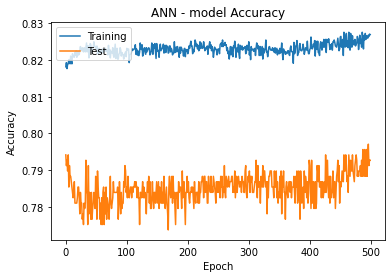

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN - model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Test'], loc='upper left')
plt.show()

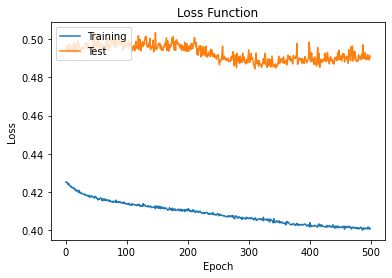

In [59]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Loss Function') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Training', 'Test'], loc='upper left') 
plt.show()

## Other Classifiers

In [60]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=(10,6),random_state=1,max_iter=150)
print(model)

model.fit(X_train,y_train)
pred = model.predict(X_test)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 6), max_iter=150,
              random_state=1)


C:\Users\renug\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

print ('\n Test using MLP')
print ("Absolute mean error:", metrics.mean_absolute_error(y_test,pred))
print ("Mean square error:", metrics.mean_squared_error(y_test,pred))
print ("Mean square root error:", np.sqrt(metrics.mean_squared_error(y_test,pred)))


 Test using MLP
Absolute mean error: 0.21021897810218979
Mean square error: 0.21021897810218979
Mean square root error: 0.4584964319405221


In [62]:
confusion_matrix(y_test,pred)

array([[534,   4],
       [140,   7]], dtype=int64)